In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Advertising.csv')

In [7]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df.shape

(200, 5)

In [9]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [12]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

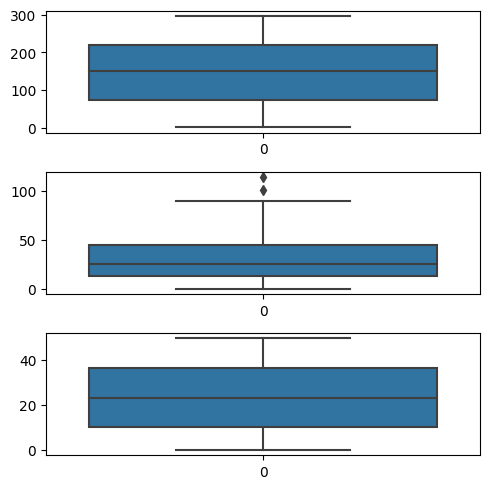

In [17]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot: xlabel='Newspaper', ylabel='Density'>

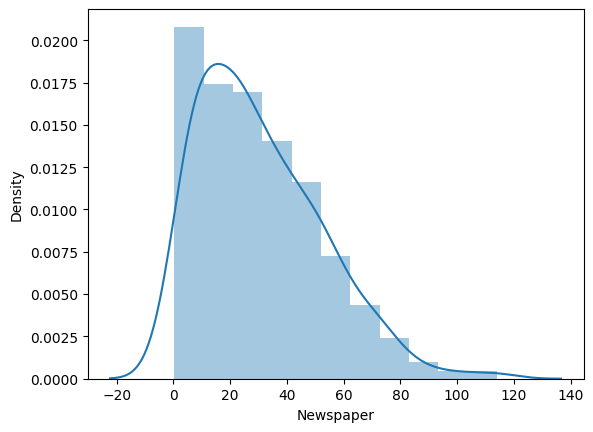

In [18]:
sns.distplot(df['Newspaper'])

In [19]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [20]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [21]:
data = df.copy()

In [22]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<AxesSubplot: >

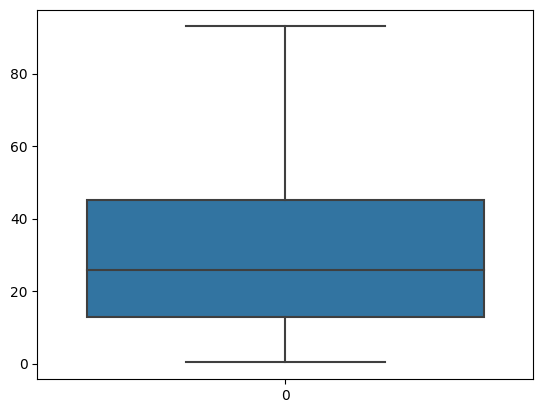

In [23]:
sns.boxplot(data['Newspaper'])

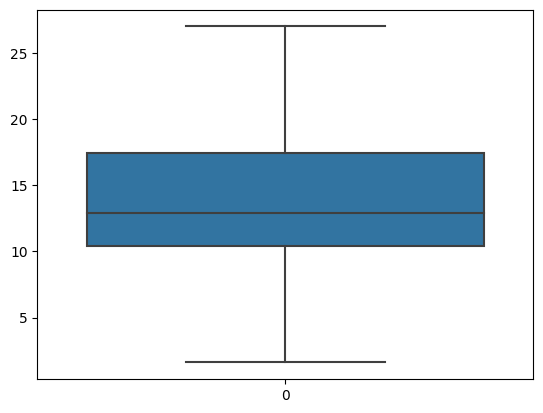

In [24]:
sns.boxplot(data['Sales']);

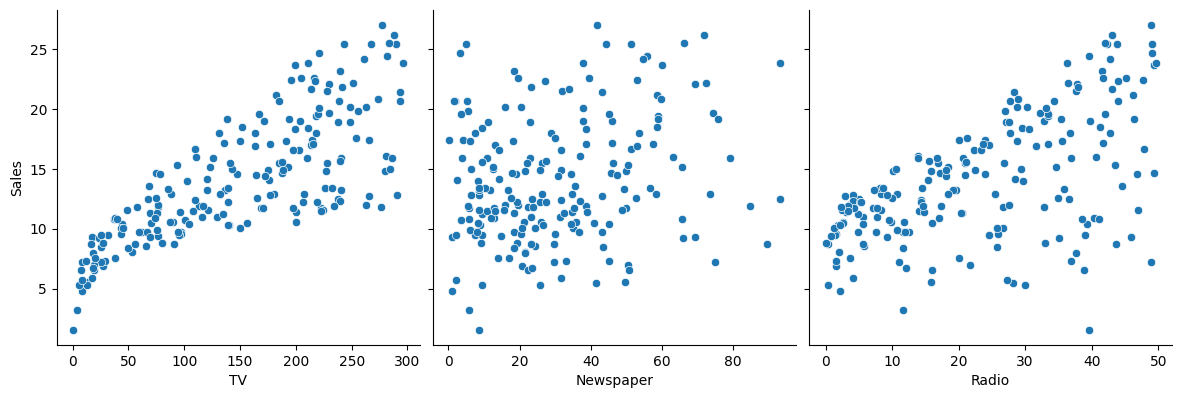

In [25]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

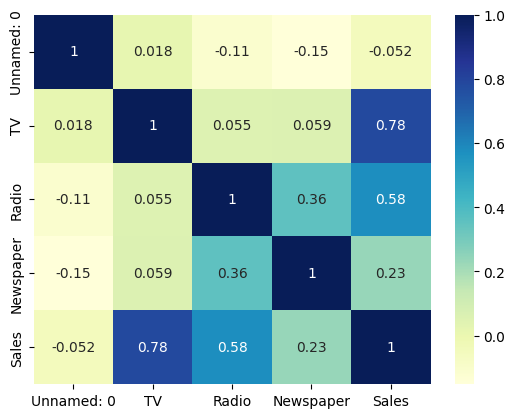

In [26]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [27]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [28]:
print(important_features)

['TV', 'Radio', 'Sales']


In [29]:
X = data['TV']
y = data['Sales']

In [30]:
X = X.values.reshape(-1,1)

In [31]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [32]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [33]:
print(X.shape,y.shape)

(200, 1) (200,)


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [41]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [42]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [43]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [44]:
knn_train_pred = knn.predict(X_train)

In [45]:
knn_test_pred = knn.predict(X_test)

In [46]:
print(knn_train_pred, knn_test_pred)

[16.32 15.44  9.94 17.34 13.76 15.28 16.04 13.54 17.34 15.28 16.7  17.96
 14.92 17.46 11.44 16.28  7.7  19.9  21.44 13.92 20.02 16.18  4.58 10.22
 19.22  9.72 14.16 13.72 16.1  19.98 17.46 17.96 12.94 10.44 10.22 15.92
 10.22 10.5  16.7  11.44 17.44 19.98 12.18 10.22 10.5  19.46 20.62  9.7
 18.78  4.58  4.58 13.54 19.46 19.46 14.58 12.96  7.76 16.22 14.58 10.5
 17.24 20.88  7.76 17.96 11.42 13.72 16.32  9.72 10.5   7.76 16.28 10.9
 11.18 15.24 18.3  13.76  9.94  9.7  15.92 16.34 13.96  4.58 20.02 13.12
 18.3  17.46 16.18 19.98 17.46 15.28  7.7  15.34  7.7  17.8  18.86 13.72
 17.64 15.24 16.28  4.58 15.28  9.72 16.32 18.3   7.48 15.8  15.28 21.44
 20.82 16.64 18.26 12.18 19.52  9.94 13.76 19.98 10.5   9.94 10.44 19.9
  7.48 11.42  7.7   9.12 18.76 14.16 10.44 10.44 16.28  9.44 19.98 16.32
  9.82 20.02] [15.28  7.76  4.58 10.18  7.48 14.58  8.6  15.94 12.94  9.94 16.04  7.76
 17.24 10.44  6.12 14.92 13.72 13.54  4.58 12.98 11.44 21.44 10.5  10.44
 11.48 10.32 19.98 12.94 17.16 20.88 19.2

In [47]:

Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [48]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5323242889267634
RMSE: 3.59251410237421


In [49]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.66661,0.532324,3.592514,0.134286


In [50]:
svr = SVR().fit(X_train,y_train)
svr


SVR()

In [51]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [52]:
print(svr_train_pred,svr_test_pred)

[14.63497735 14.19039407  9.12270308 16.65649179 12.49504569 14.91685312
 16.5514653  13.73669372 16.70184694 14.69437801 17.44006415 17.48083433
 14.77355024 17.24487982 10.60179245 15.57861633  8.5645894  17.50162109
 17.56067149 14.9760322  16.71078409 17.09219123  8.38500806 11.63294515
 16.79715141  9.81113085 13.16224499 16.25764305 17.46949446 17.54385923
 17.25232692 17.47805823 12.06870167 10.21426514 11.49936748 16.16205522
 11.45774864 11.21720673 17.44006415 10.58527856 15.98812117 17.48337615
 10.63895002 11.51186372 11.13036081 17.20705412 17.30006655  9.30429275
 17.01290388  8.42679293  8.41496542 13.85294679 17.21997524 17.18862721
 13.28856867 12.34996637  8.72910471 17.38848604 13.40179402 11.08490146
 17.02854519 17.57465908  8.7936593  17.48083433 10.71326709 16.22744083
 14.53103128  9.49991685 11.18824788  8.69606018 15.72048    10.39957467
 10.51510225 15.19696512 16.94522784 12.51717117  9.08515426  9.30062496
 16.16205522 15.86934214 12.72707146  8.40113847 16

In [53]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5798998468167393
RMSE: 3.4048853587566366


In [54]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.666610,0.532324,3.592514,0.134286
1,Support Vector Machine,0.556381,0.579900,3.404885,-0.023519


In [57]:
import statsmodels.api as sm

In [58]:
X_train_constant = sm.add_constant(X_train)

In [59]:
model = sm.OLS(y_train, X_train_constant).fit()

In [60]:
model.params

const    7.040538
x1       0.046978
dtype: float64

In [61]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     200.2
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           3.12e-28
Time:                        13:23:41   Log-Likelihood:                -348.44
No. Observations:                 134   AIC:                             700.9
Df Residuals:                     132   BIC:                             706.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0405      0.581     12.125      0.0

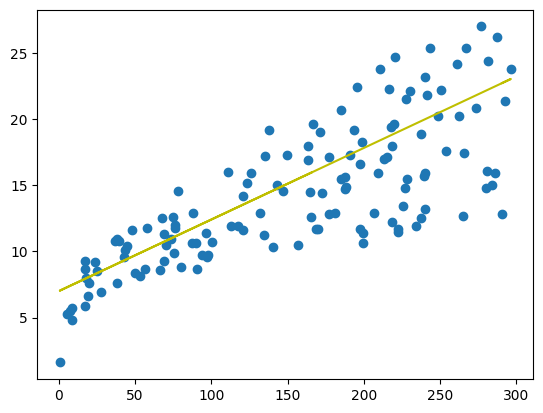

In [62]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [63]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

179   -2.220024
180   -3.897226
148    2.074314
113   -0.987038
77     1.498664
         ...   
170   -0.989417
33    -2.117782
95     2.188024
196   -1.765825
35    -7.896919
Name: Sales, Length: 134, dtype: float64

In [64]:
y_train_pred

array([14.82002433, 14.39722616,  8.82568575, 16.88703764, 12.70133569,
       15.08779651, 16.76019819, 13.96033471, 16.94341073, 14.87639742,
       18.19301423, 18.31985368, 14.95156154, 17.75142502, 10.58734481,
       15.72669153,  7.88143648, 18.3950178 , 18.70976755, 15.1441696 ,
       20.96469116, 17.4883506 ,  7.07342219, 11.75708643, 17.06555242,
        9.68067761, 13.39190605, 16.4266574 , 18.28227162, 19.31577827,
       17.76551829, 18.31045817, 12.24095546, 10.14575561, 11.60675819,
       16.32330674, 11.55978062, 11.28731068, 18.19301423, 10.56855378,
       16.14009419, 19.57885269, 10.62962463, 11.62085147, 11.18865777,
       20.22714323, 20.04862845,  9.06527138, 17.3662089 ,  7.44454504,
        7.38347419, 14.07308089, 20.20365444, 20.26002753, 13.5187455 ,
       12.5463097 ,  8.21967503, 18.05677926, 13.63149168, 11.13698244,
       17.38969769, 18.96344646,  8.33242121, 18.31985368, 10.71418427,
       16.3937731 , 14.72137142,  9.30955477, 11.25442638,  8.15

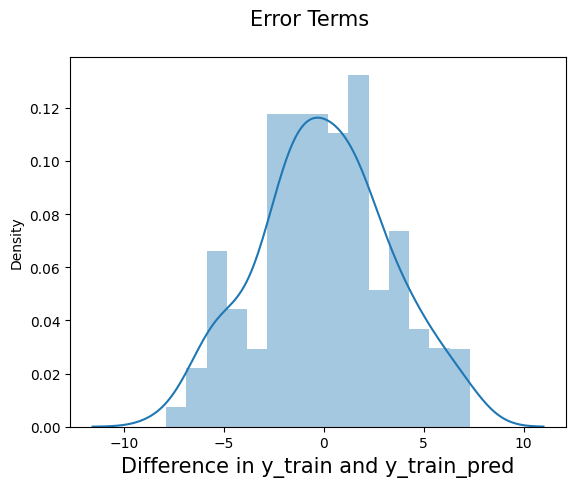

In [65]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

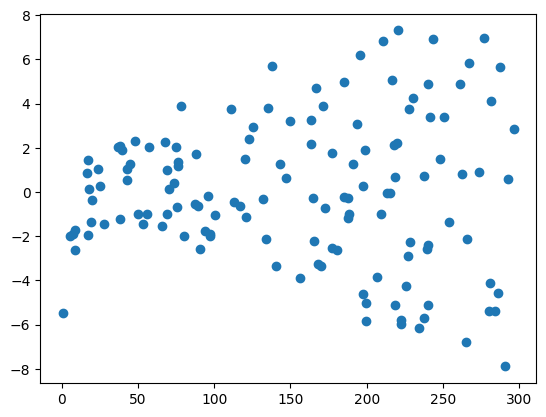

In [66]:
plt.scatter(X_train, res)
plt.show()

In [67]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [68]:
y_pred

array([13.19929799,  8.21497727,  7.23314595,  9.96724082,  7.91901854,
       13.57981635,  8.38409654, 17.39909321, 12.19867564,  9.84040137,
       16.75550043,  8.24316381, 20.3633782 , 10.18333767,  7.59017552,
       16.67094079, 16.38437758, 14.07777865,  7.44924279, 16.55349686,
       10.5779493 , 18.72855858,  9.1404355 , 10.25380403, 11.86513486,
       11.06651608, 19.39094239, 12.19867564, 17.94403308, 19.03861058,
       17.07025018, 20.03923293, 17.12662327, 10.62962463, 14.15764052,
       18.30576041, 16.11660541, 13.11943611, 11.4517322 , 17.82189138,
       13.43888362, 18.23059629, 15.29449784,  7.65594412, 17.56351472,
       20.83315395,  7.9237163 ,  7.66064188,  7.40696298, 13.58451411,
       15.2663113 ,  8.52033151,  8.2995369 , 12.08592946, 11.53629183,
       12.48993661, 15.61864311, 13.59390962, 10.54976275, 13.67846926,
       16.93871297, 11.95439225, 12.68724242, 20.64994141, 16.62866098,
       17.20648515])

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [70]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.2120665721299475

In [71]:
r2 = r2_score(y_test, y_pred)
r2

0.6261331770553109

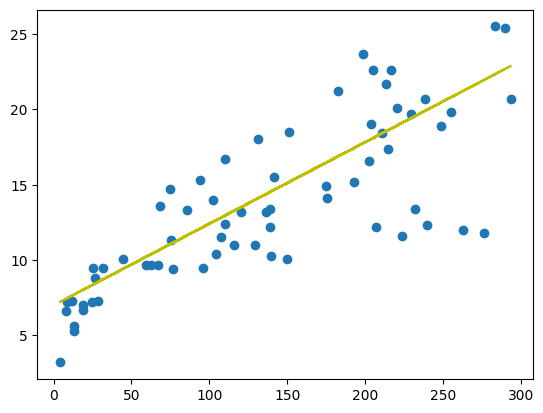

In [72]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()